In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

In [4]:
# import some data to play with
irisdata_df = pd.read_csv('../datasets/IRIS_flower_dataset_kaggle.csv')

# encode the class column from class strings to integer equivalents
irisdata_df_enc = irisdata_df.replace({"species":  {"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}})
irisdata_df_enc

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# copy only 2 feature columns
# and convert pandas dataframe to numpy array
X = irisdata_df_enc[['petal_length', 'petal_width']].to_numpy(copy=True)
#X = irisdata_df_enc[['sepal_length', 'sepal_width']].to_numpy(copy=True)
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [6]:
# convert pandas dataframe to numpy array
# and get a flat 1D copy of 2D numpy array
y = irisdata_df_enc[['species']].to_numpy(copy=True).flatten()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [7]:
svc = svm.SVC(kernel='rbf').fit(X, y)

In [131]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x_min

0.0

In [132]:
# prevent division by zero
if x_min == 0.0:
    x_min = 0.1

x_min

0.1

In [142]:
h = (x_max / x_min)/1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

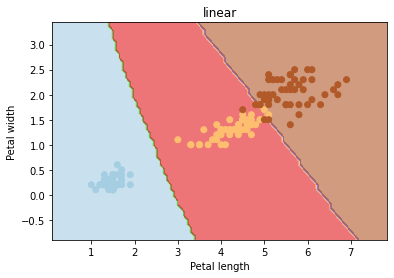

In [144]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#print(Z)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.title('linear')
#plt.savefig('plot.png')
plt.show()

In [8]:
def plotSVC(title, xlabel, ylabel):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # prevent division by zero
    if x_min == 0.0:
        x_min = 0.1
    
    h = (x_max / x_min)/1000
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

# Vary `kernel`

The `kernel` parameter selects the type of hyperplane that is used to separate the data. Using `linear` ([linear classifier](https://en.wikipedia.org/wiki/Linear_classifier)) kernel will use a linear hyperplane (a line in the case of 2D data). The `rbf` ([radial basis function kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)) and `poly` ([polynomial kernel](https://en.wikipedia.org/wiki/Polynomial_kernel)) kernel use non linear hyperplanes.

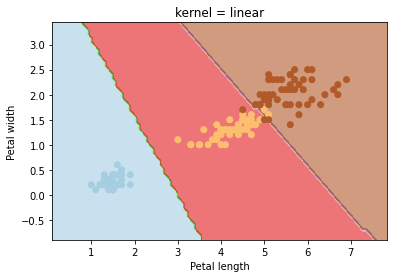

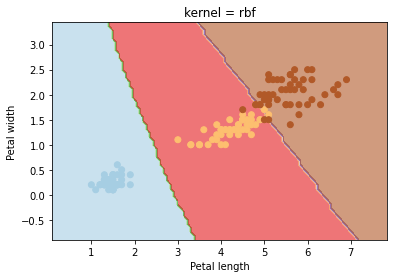

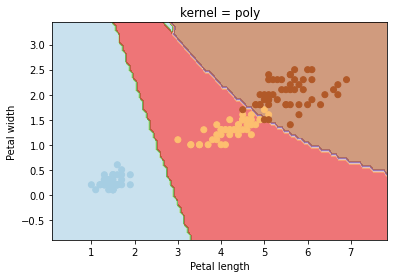

In [9]:
kernels = ['linear', 'rbf', 'poly']

xlabel = 'Petal length'
ylabel = 'Petal width'

for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel = ' + str(kernel), xlabel, ylabel)

# Vary `gamma`

The `gamma` parameter is used for non linear hyperplanes. The higher the gamma value it tries to **exactly fit** the training data set.

As we can see, increasing gamma leads to **overfitting** as the classifier tries to perfectly fit the training data.

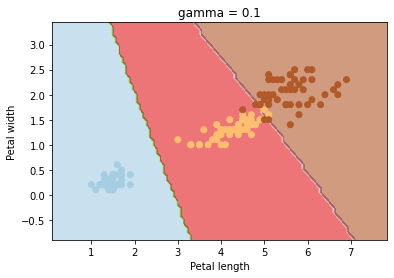

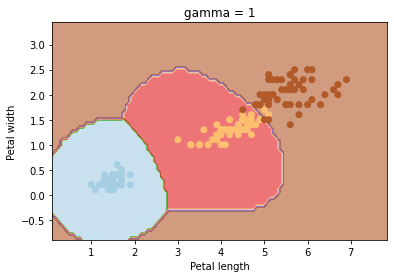

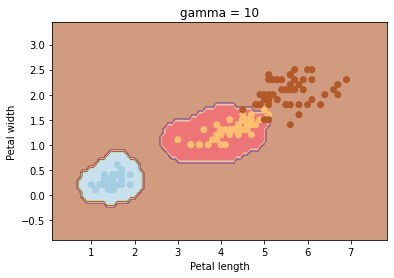

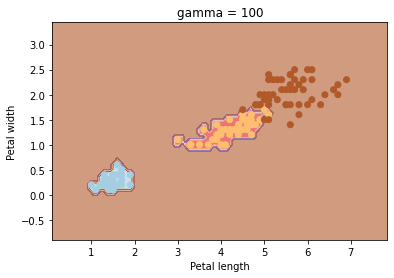

In [10]:
gammas = [0.1, 1, 10, 100]

xlabel = 'Petal length'
ylabel = 'Petal width'

for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC('gamma = ' + str(gamma), xlabel, ylabel)

# Vary `C`

The `C` parameter is the **penalty** of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

But be careful: to high `C` values may lead to **overfitting** the training data.

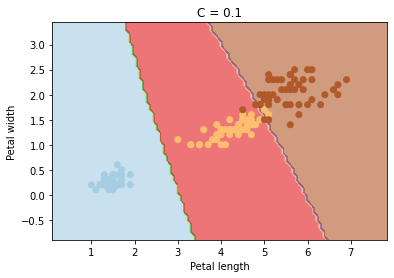

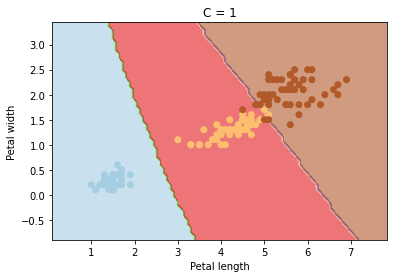

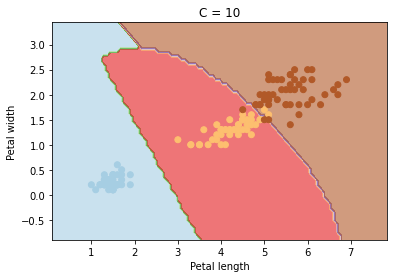

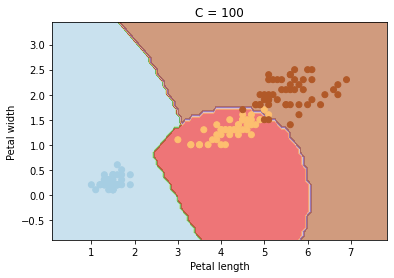

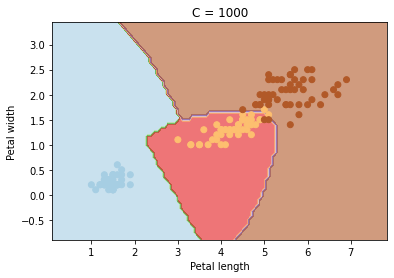

In [11]:
cs = [0.1, 1, 10, 100, 1000]

xlabel = 'Petal length'
ylabel = 'Petal width'

for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
    plotSVC('C = ' + str(c), xlabel, ylabel)

# degree

The `degree` parameter is used when the `kernel` is set to `poly`. It’s basically the **degree of the polynomial** used to find the hyperplane to split the data.

Using `degree = 1` is the same as using a `linear` kernel. Also, increasing this parameters leads to **higher training times**.

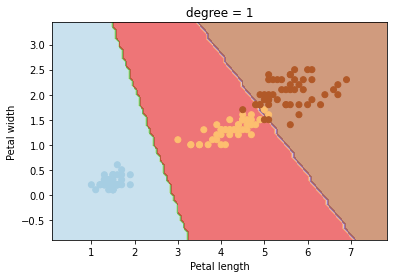

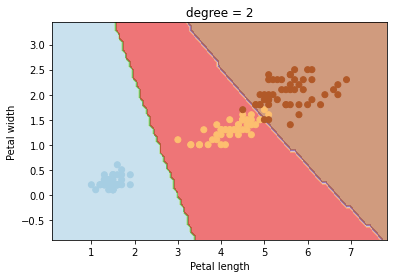

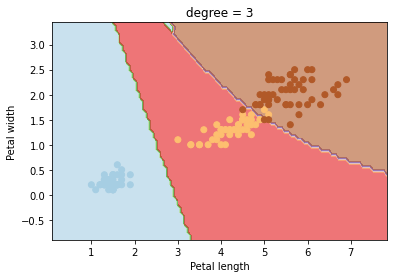

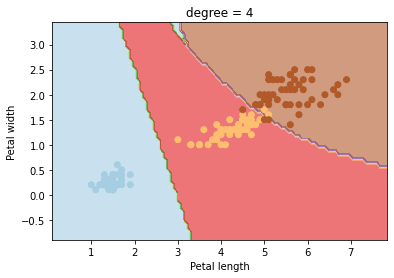

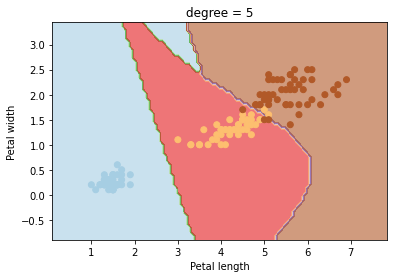

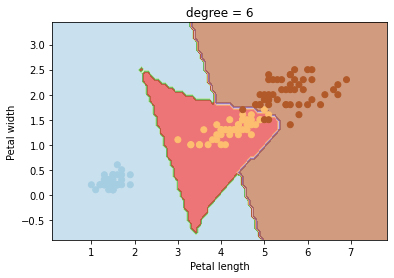

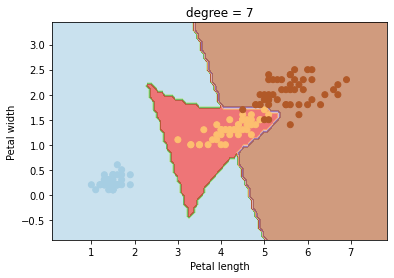

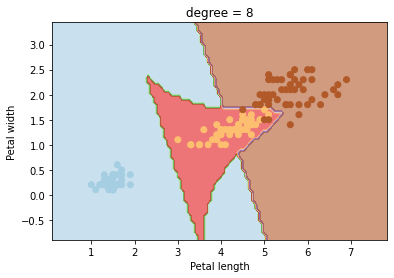

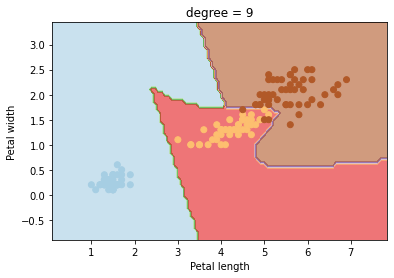

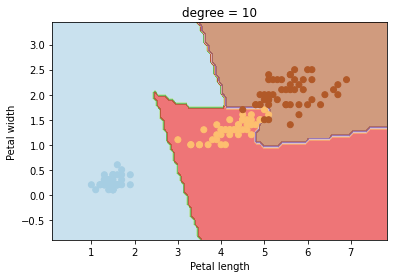

In [13]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

xlabel = 'Petal length'
ylabel = 'Petal width'

for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
    plotSVC('degree = ' + str(degree), xlabel, ylabel)